## PCA Analysis of Hyperparameters and Network Divergence

In [494]:
import pandas as pd

In [495]:
import plotly
import plotly.graph_objs as go

### VGG Architecture

In [545]:
vgg_df = pd.read_csv('../wandb_results/vgg_cifar10_wandb_export.csv')

In [530]:
vgg_df

,Name,accuracy_diff,pt_test_acc,tf_test_acc,State,Notes,User,Tags,Created,Runtime,...,iterations_since_restore,pt_average_training_loss,pt_latest_training_loss,tf_training_loss,time_since_restore,time_this_iter_s,time_total_s,timestamp,timesteps_since_restore,training_iteration
0,dual_train_5e67eae2,6.815194e-01,0.099981,0.7815,finished,-,mzvyagin,NaN,2021-08-24T03:50:06.000Z,1095,...,NaN,"[2.2262024879455566,2.140955686569214,1.923969...","[2.2262024879455566,2.140955686569214,1.923969...","[2.3022499084472656,2.2962820529937744,2.30336...",NaN,NaN,NaN,NaN,NaN,NaN
1,dual_train_1295910a,6.561938e-01,0.756194,0.1000,finished,-,mzvyagin,NaN,2021-08-24T04:59:34.000Z,1271,...,NaN,"[2.4968199729919434,1.8460111618041992,1.82043...","[2.4968199729919434,1.8460111618041992,1.82043...","[2.3017570972442627,2.3037261962890625,2.30359...",NaN,NaN,NaN,NaN,NaN,NaN
2,dual_train_27594472,6.532896e-01,0.753290,0.1000,finished,-,mzvyagin,NaN,2021-08-24T03:27:05.000Z,458,...,NaN,"[2.200124502182007,2.30287504196167,2.20806741...","[2.200124502182007,2.30287504196167,2.20806741...","[2.3025827407836914,2.295387506484986,2.287919...",NaN,NaN,NaN,NaN,NaN,NaN
3,dual_train_878cb400,6.471333e-01,0.747133,0.1000,finished,-,mzvyagin,NaN,2021-08-24T01:06:37.000Z,789,...,NaN,"[2.3025057315826416,2.2905972003936768,2.08488...","[2.3025057315826416,2.2905972003936768,2.08488...","[2.302562475204468,2.3024942874908447,2.302377...",NaN,NaN,NaN,NaN,NaN,NaN
4,dual_train_11829286,6.318243e-01,0.731824,0.1000,finished,-,mzvyagin,NaN,2021-08-24T02:00:35.000Z,456,...,NaN,"[2.30769681930542,2.30904483795166,2.096481084...","[2.30769681930542,2.30904483795166,2.096481084...","[2.302609920501709,2.2870705127716064,2.271937...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,dual_train_8e8ce4c6,4.172325e-10,0.100000,0.1000,finished,-,mzvyagin,NaN,2021-08-24T06:07:28.000Z,2214,...,NaN,"[2.554588794708252,2.588235855102539,2.6147625...","[2.554588794708252,2.588235855102539,2.6147625...","[2.3022260665893555,2.304032325744629,2.303966...",NaN,NaN,NaN,NaN,NaN,NaN
396,dual_train_d7cca598,4.172325e-10,0.100000,0.1000,finished,-,mzvyagin,NaN,2021-08-24T01:01:42.000Z,760,...,NaN,"[2.375936985015869,2.3762497901916504,2.376238...","[2.375936985015869,2.3762497901916504,2.376238...","[2.308305263519287,2.3087804317474365,2.308783...",NaN,NaN,NaN,NaN,NaN,NaN
397,dual_train_f3ec2aae,4.172325e-10,0.100000,0.1000,finished,-,mzvyagin,NaN,2021-08-24T07:43:21.000Z,4776,...,NaN,"[2.340893268585205,2.337571859359741,2.3374533...","[2.340893268585205,2.337571859359741,2.3374533...","[2.3047940731048584,2.305086374282837,2.305087...",NaN,NaN,NaN,NaN,NaN,NaN
398,dual_train_d24e215e,NaN,NaN,NaN,finished,-,mzvyagin,NaN,2021-08-23T23:57:08.000Z,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [498]:
from sklearn.preprocessing import minmax_scale

In [499]:
import math

In [500]:
scaled_adam_epsilon = minmax_scale(vgg_df['adam_epsilon'])

In [501]:
markersize = scaled_adam_epsilon
markercolor = vgg_df['learning_rate']

In [502]:
fig = go.Figure()

In [ ]:
fig1= go.Scatter3d(x=vgg_df['epochs'],
                    y=vgg_df['batch_size'],
                    z=vgg_df['accuracy_diff'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                colorscale='Viridis', 
                                colorbar=dict(thickness=20)),
                    line=dict (width=0.02),
                    mode='markers')
                   

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Epochs"),
                                yaxis=dict( title="Batch Size"),
                                zaxis=dict(title="Accuracy Difference")),)

plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True)



In [503]:
import matplotlib.pyplot as plt

In [504]:
import numpy as np

In [ ]:
# f = plt.figure(figsize=(10,10))
# ax = f.add_subplot(121, projection="3d")
# ax2 = f.add_subplot(122, projection="3d")
# # ax3 = f.add_subplot(133)
# img = ax.scatter(vgg_df['learning_rate'], vgg_df['batch_size'], vgg_df['epochs'], c=vgg_df['pt_test_acc'], cmap="viridis", s=vgg_df['adam_epsilon']*100, alpha=1)
# # f.colorbar(img, label='PT Test Accuracy', pad=0.2)
# ax.set_xlabel("Learning Rate", labelpad=15)
# ax.set_ylabel("Batch Size", labelpad=15)
# ax.set_zlabel("Epochs", labelpad=15)
# ax.set_title("PyTorch")
# img.set_clim(0, 1)
# img2 = ax2.scatter(vgg_df['learning_rate'], vgg_df['batch_size'], vgg_df['epochs'], c=vgg_df['tf_test_acc'], cmap="viridis", s=vgg_df['adam_epsilon']*100, alpha=1)
# # f.colorbar(img2, label='TF Test Accuracy', pad=0.2)
# img2.set_clim(0, 1)
# plt.xlabel("Learning Rate", labelpad=15)
# plt.ylabel("Batch Size", labelpad=15)
# ax2.set_zlabel("Epochs", labelpad=15)
# ax2.set_title("TensorFlow")
# plt.tight_layout()
# f.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
#                     wspace=0.02, hspace=0.02)

# # add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

# cb_ax = f.add_axes([0.83, 0.1, 0.02, 0.8])
# cbar = f.colorbar(img, cax=cb_ax, pad=0.5)

In [ ]:
resnet_df = pd.read_csv('../wandb_results/resnet_cifar10_wandb_export.csv')

In [537]:
import matplotlib as mpl

In [546]:
np.mean(resnet_df['accuracy_diff'])

0.12265521495527776

In [547]:
np.median(resnet_df['accuracy_diff'])

0.08433875724260986

In [548]:
resnet_df['accuracy_diff']

0      6.815194e-01
1      6.561938e-01
2      6.532896e-01
3      6.471333e-01
4      6.318243e-01
           ...     
393    4.172325e-10
394    4.172325e-10
395    4.172325e-10
396    4.172325e-10
397    4.172325e-10
Name: accuracy_diff, Length: 398, dtype: float64

In [549]:
resnet_df['reaches_threshold'] = resnet_df['accuracy_diff'] > np.median(resnet_df['accuracy_diff'])

In [550]:
resnet_df_reaches_threshold = resnet_df[resnet_df['reaches_threshold']]

In [551]:
resnet_df_reaches_threshold['accuracy_diff']

0      0.681519
1      0.656194
2      0.653290
3      0.647133
4      0.631824
         ...   
194    0.086581
195    0.086433
196    0.085861
197    0.085347
198    0.084765
Name: accuracy_diff, Length: 199, dtype: float64

In [552]:
resnet_df_below_threshold = resnet_df[~resnet_df['reaches_threshold']]

In [553]:
resnet_df_below_threshold['accuracy_diff']

199    8.391292e-02
200    8.271380e-02
201    8.199715e-02
202    8.161598e-02
203    8.096042e-02
           ...     
393    4.172325e-10
394    4.172325e-10
395    4.172325e-10
396    4.172325e-10
397    4.172325e-10
Name: accuracy_diff, Length: 199, dtype: float64

In [554]:
min(resnet_df['accuracy_diff'])

4.172325124285337e-10

In [555]:
max(resnet_df['accuracy_diff'])

0.6815193943679333

In [556]:
np.median(resnet_df['accuracy_diff'])

0.08433875724260986

In [557]:
np.mean(resnet_df['accuracy_diff'])

0.12265521495527776

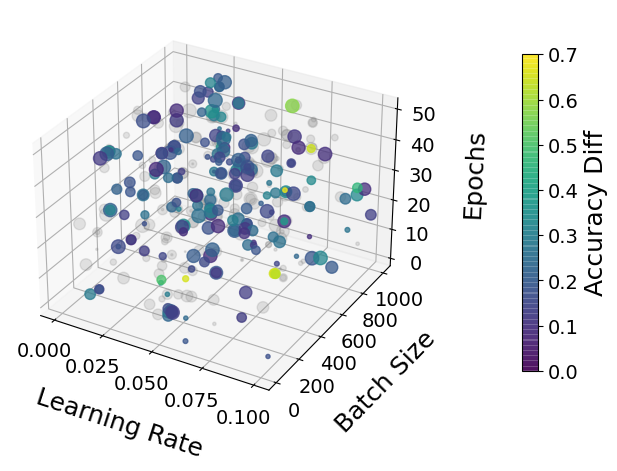

In [562]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img1 = ax.scatter(resnet_df_below_threshold['learning_rate'], resnet_df_below_threshold['batch_size'], resnet_df_below_threshold['epochs'],  c="Grey", s=resnet_df_below_threshold['adam_epsilon']*100, alpha=0.2, vmin=0, vmax=1)
img = ax.scatter(resnet_df_reaches_threshold['learning_rate'], resnet_df_reaches_threshold['batch_size'], resnet_df_reaches_threshold['epochs'], c=resnet_df_reaches_threshold['accuracy_diff'], cmap="viridis", s=resnet_df_reaches_threshold['adam_epsilon']*100, alpha=0.75, vmin=0, vmax=0.7)
# img.set_clim(0, 1)
fig.colorbar(img, label='Accuracy Diff', pad=0.2, fraction=0.03)
plt.xlabel("Learning Rate", labelpad=15)
# ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
plt.ylabel("Batch Size", labelpad=15)
ax.set_zlabel("Epochs", labelpad=15)
plt.tight_layout()
plt.locator_params(axis='x', nbins=5)
plt.show()

In [559]:
# np.max(dense_df['tf_test_acc'])

0.7712000012397766

In [560]:
# np.median(resnet_df['accuracy_diff'])

0.03854268257107052

In [519]:
# torch_model.state_dict().keys()

NameError: name 'torch_model' is not defined

In [520]:
# min(vgg_df['learning_rate'])

1e-08

In [563]:
fig.savefig('resnet_params_5d_median_cutoff.png', dpi=500, bbox_inches="tight")

In [ ]:
plt.show()

In [ ]:
plt.scatter(vgg_df['learning_rate'], vgg_df['accuracy_diff'])

In [ ]:
plt.scatter(vgg_df['batch_size'], vgg_df['accuracy_diff'])

In [ ]:
plt.scatter(vgg_df['adam_epsilon'], vgg_df['accuracy_diff'])

In [ ]:
plt.scatter(vgg_df['epochs'], vgg_df['accuracy_diff'])

### Trying out PCA...

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
X = vgg_df[features].values
y = vgg_df['accuracy_diff'].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
# thanks to https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=2, random_state=0)

# Fit PCA to features
principalComponents = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.get_covariance()

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
import seaborn as sns

In [ ]:
# fig = plt.figure(figsize=(15, 15))
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(principalComponents[:, 0],principalComponents[:, 1] , c= vgg_df['accuracy_diff'], cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Differnece")
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.savefig('vgg_pca_params.png', bbox_inches="tight", dpi=200)

### For DenseNet

In [ ]:
dense_df = pd.read_csv('../wandb_results/densenet_cifar10_wandb_export.csv')

In [ ]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
dense_X = dense_df[features].values
dense_y = dense_df['accuracy_diff'].values

In [ ]:
dense_X = StandardScaler().fit_transform(dense_X)

In [ ]:
dense_pca = PCA(n_components=2, random_state=0)

# Fit PCA to features
dense_principal_components = dense_pca.fit_transform(dense_X)

In [ ]:
dense_pca.get_covariance()

In [ ]:
dense_pca.explained_variance_ratio_

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(dense_principal_components[:, 0],dense_principal_components[:, 1] , c= dense_df['accuracy_diff'], cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Difference")
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.savefig('dense_pca_params.png', bbox_inches="tight", dpi=200)

### For ResNet

In [ ]:
resnet_df = pd.read_csv('../wandb_results/resnet_cifar10_wandb_export.csv')

In [ ]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
resnet_X = resnet_df[features].values
resnet_y = resnet_df['accuracy_diff'].values

In [ ]:
resnet_X = StandardScaler().fit_transform(resnet_X)

In [ ]:
resnet_pca = PCA(n_components=2, random_state=0)

# Fit PCA to features
resnet_principal_components = resnet_pca.fit_transform(resnet_X)

In [ ]:
resnet_pca.get_covariance()

In [ ]:
resnet_pca.explained_variance_ratio_

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(resnet_principal_components[:, 0],resnet_principal_components[:, 1] , c= resnet_df['accuracy_diff'], cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Difference")
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
plt.savefig('resnet_pca_params.png', bbox_inches="tight", dpi=200)